## Importation des packages et des données

In [ ]:
import scipy
import numpy as np # manipulate N-dimensional arrays
import pandas as pd # data frame
import matplotlib.pyplot as plt # data plotting
import matplotlib.gridspec as gridspec
import seaborn # advanced data plotting
from sklearn import preprocessing # basic ML models
# import scipy # scientific computing library
from tqdm import tqdm #progress bar
import time

import tensorflow as tf

import time
import os
import pickle

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

## Visualisation, normalisation et séparation des données

In [ ]:
train_images = train_images.reshape(60000, 28 , 28, 1)
test_images = test_images.reshape(10000, 28 , 28, 1)

In [ ]:
print('train shape:', train_images.shape)
print('test shape:', test_images.shape)

train shape: (60000, 28, 28, 1)
test shape: (10000, 28, 28, 1)


On normalise les données pour qu'elles appartiennent à l'intervalle [0, 1] (activation function = 'sigmoid')

In [ ]:
kitrain_images = train_images/255
test_images = test_images/255

In [ ]:
print(np.min(train_images),np.max(train_images))
print(np.min(test_images),np.max(test_images))

0 255
0.0 1.0


On peut visualiser un exemple de données provenant du train.

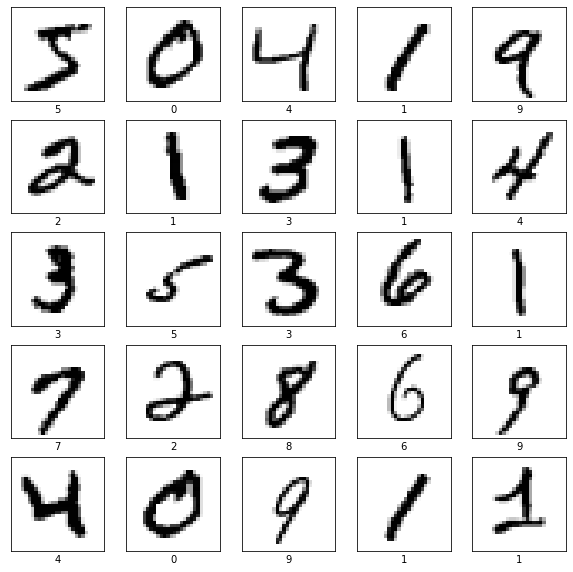

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape([28,28]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Création de 2 sous bases de train (une avec label et une autre sans label)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_labeled, X_train_unlabeled, Y_train_labeled, Y_train_unlabeled = train_test_split(train_images, train_labels, test_size=59900, shuffle= True)

In [ ]:
print('train labeled shape:', X_train_labeled.shape)
print('train unlabeled shape:', X_train_unlabeled.shape)

train labeled shape: (100, 28, 28, 1)
train unlabeled shape: (59900, 28, 28, 1)


In [ ]:
num_classes = np.max(train_labels) + 1
print("num_classes = ", num_classes)
y_train = tf.keras.utils.to_categorical(Y_train_labeled, num_classes)
y_test = tf.keras.utils.to_categorical(test_labels, num_classes)

num_classes =  10


## 1. Entrainement sur uniquement 100 valeurs labélisées et prédiction sur tout

In [ ]:
from keras.models import Model,Sequential
from keras.layers import Input, Dense, BatchNormalization, Dropout, ReLU, Activation, Flatten, Conv2D, MaxPooling2D, Reshape

In [ ]:
from keras.backend import clear_session
clear_session()

Création du CNN

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size= (3, 3), padding='same', strides=(1, 1),
                 input_shape=X_train_labeled.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size= (3, 3), padding='same', strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size= (3, 3), padding='same', strides=(1, 1)))
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size= (3, 3), padding='same', strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size= (3, 3), padding='same', strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Entrainement du modèle

In [ ]:
from keras.optimizers import Adam

In [ ]:
opt = Adam(lr=0.001)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 10)

In [ ]:
hist_CNN = model.fit(X_train_labeled, y_train,
              batch_size=30,
              epochs=100,
              validation_split=0.1,
              shuffle=True,
              callbacks=[es])

Epoch 1/100
3/3 [==============================] - 3s 246ms/step - loss: 2.9271 - accuracy: 0.1319 - val_loss: 5.5221 - val_accuracy: 0.1000
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 2.6152 - accuracy: 0.2542 - val_loss: 5.8957 - val_accuracy: 0.2000
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 2.4899 - accuracy: 0.2556 - val_loss: 7.1535 - val_accuracy: 0.3000
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 2.4566 - accuracy: 0.3069 - val_loss: 8.1378 - val_accuracy: 0.3000
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 2.2850 - accuracy: 0.2847 - val_loss: 8.5535 - val_accuracy: 0.2000
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 2.4325 - accuracy: 0.2028 - val_loss: 8.3259 - val_accuracy: 0.2000
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 2.6360 - accuracy: 0.2111 - val_loss: 7.8716 - val_accuracy: 0.2000
Epoch 8/100
3/3 [==

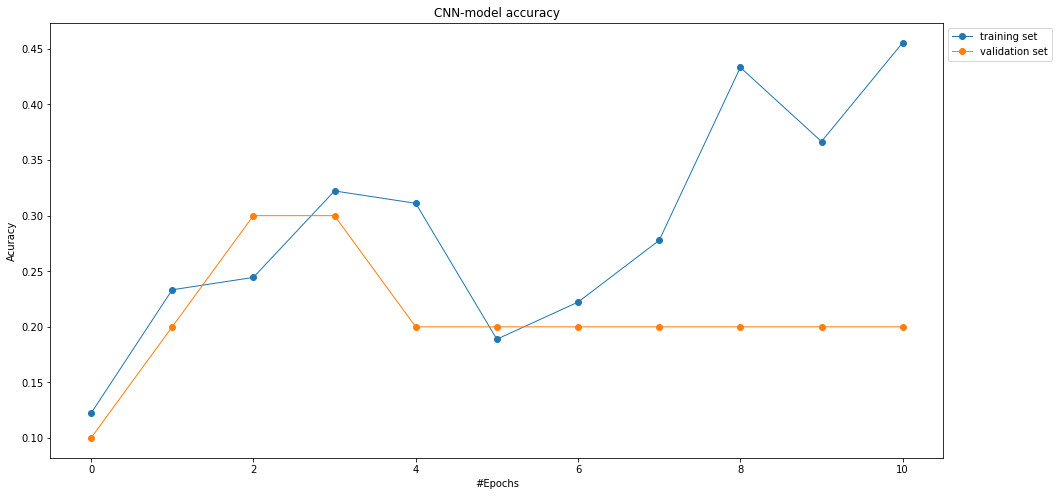

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(hist_CNN.history['accuracy'], label='training set',marker='o', linestyle='solid',linewidth=1, markersize=6)
plt.plot(hist_CNN.history['val_accuracy'], label='validation set',marker='o', linestyle='solid',linewidth=1, markersize=6)
plt.title("CNN-model accuracy")
plt.xlabel('#Epochs')
plt.ylabel('Acuracy')
plt.legend(bbox_to_anchor=( 1., 1.))

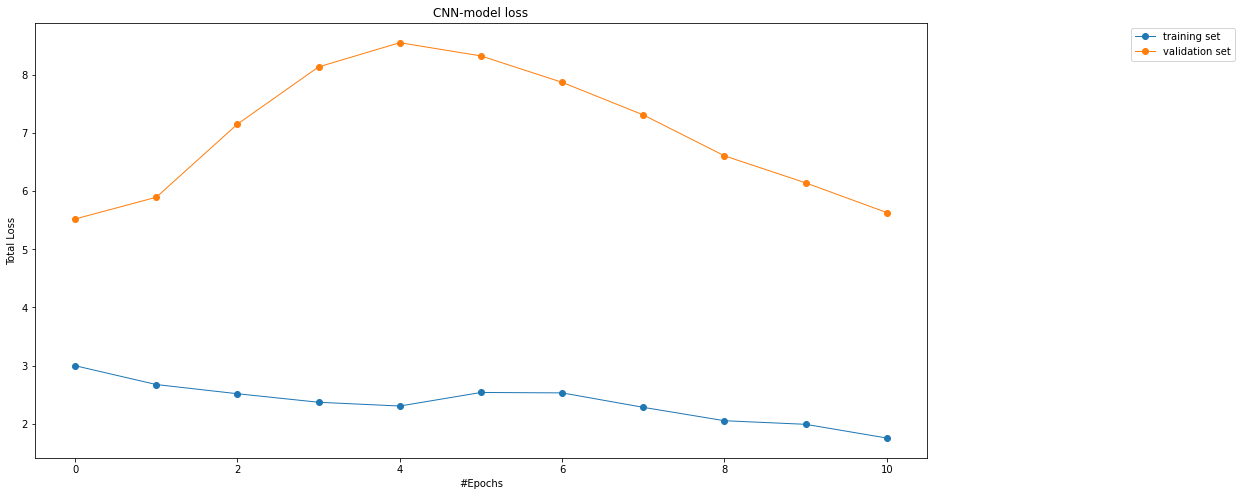

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(hist_CNN.history['loss'], label='training set',marker='o', linestyle='solid',linewidth=1, markersize=6)
plt.plot(hist_CNN.history['val_loss'], label='validation set',marker='o', linestyle='solid',linewidth=1, markersize=6)
plt.title("CNN-model loss")
plt.xlabel('#Epochs')
plt.ylabel('Total Loss')
plt.legend(bbox_to_anchor=( 1.35, 1.))

In [ ]:
print('\n# Evaluate on test data')
results = model.evaluate(test_images, y_test, batch_size=128)
print('test loss, test acc:', results)


# Evaluate on test data
79/79 [==============================] - 1s 5ms/step - loss: 3.5658 - accuracy: 0.1135
test loss, test acc: [3.565798044204712, 0.11349999904632568]


## 2. Semi supervised Learning avec GAN

In [ ]:
clear_session()

NameError: ignored

a) Configuration des CNN generator et discriminator

In [ ]:
dim_x=X_train_unlabeled.shape[1]*X_train_unlabeled.shape[2]
dim_z=100

In [ ]:
y_train = tf.keras.utils.to_categorical(Y_train_labeled, num_classes + 1)

In [ ]:
def make_generator():
  model = Sequential()
  model.add(Dense(128, use_bias=False, input_shape=(dim_z,)))
  model.add(ReLU())
  model.add(Dense(dim_x, use_bias=False))
  model.add(Activation("sigmoid"))
  model.add(Reshape(target_shape=(28,28,1)))

  return(model)

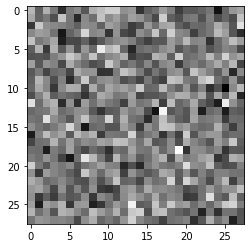

In [ ]:
generator = make_generator()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
generated_image.shape

TensorShape([1, 28, 28, 1])

In [ ]:
def make_discriminator():
  model = Sequential()

  model.add(Conv2D(filters = 32, kernel_size= (3, 3), padding='same', strides=(1, 1),
                 input_shape=X_train_labeled.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(filters = 32, kernel_size= (3, 3), padding='same', strides=(1, 1)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 64, kernel_size= (3, 3), padding='same', strides=(1, 1)))
  model.add(Activation('relu'))
  model.add(Conv2D(filters = 64, kernel_size= (3, 3), padding='same', strides=(1, 1)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 128, kernel_size= (3, 3), padding='same', strides=(1, 1)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.6))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes+1))
  model.add(Activation('softmax'))

  return(model)

In [ ]:
discriminator = make_discriminator()
decision = discriminator(generated_image)
print (decision)

tf.Tensor(
[[0.09021495 0.08987802 0.09412114 0.09109326 0.08930913 0.09151919
  0.08995157 0.09158561 0.08868527 0.09309503 0.09054688]], shape=(1, 11), dtype=float32)


In [ ]:
categorical_cross_entropy = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

In [ ]:
categorical_cross_entropy(y_train,discriminator(X_train_labeled, training = True))

<tf.Tensor: shape=(), dtype=float32, numpy=2.870053>

b) Définition de la loss et des optimizers

L'idée est que le discrimateur va servir de classifieur.
Nous aurons à disposition les données labélisées, non labélisées et un bruit.
Notre GAN va prédire 11 classes (10 classes réelles et 1 classe fake).

Pour le génrateur, on utilise du feature matching.

Pour le discriminateur, on considère la loss supervisée et la loss non supervisée:

$$ L = L_{supervised} + L_{unsupervised} $$

Où $L_{unsupervised}$ est la loss habituelle du discriminateur et $L_{supervised}$ est la loss de la classification réalisée.

$$ L_{unsupervised} = \mathbb{E}_{x\sim P_{data}(x)}\big[\log (1-p(y=K+1|x,D))\big]+\mathbb{E}_{z\sim P(z)}\big[\log p(y=K+1|G(z),D))\big] $$

$$ L_{supervised} = \mathbb{E}_{x\sim P_{data}(x)}\big [\log(p(y|x,y<K+1))\big] $$



In [ ]:
#binary_cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def generator_loss(data_output, gen_output):
    mom_data = tf.keras.backend.mean(data_output, axis = 0)
    #print(mom_data.shape)
    mom_gen = tf.keras.backend.mean(gen_output, axis = 0)
    return tf.keras.losses.MSE(mom_data, mom_gen)

In [ ]:
def discriminator_loss(real_labeled, labeled_output): #, real_output, fake_output):
    supervised_loss = categorical_cross_entropy(y_true=real_labeled, y_pred = labeled_output)

    #real_loss = binary_cross_entropy(y_true=tf.ones_like(real_output), y_pred=real_output)
    #fake_loss = binary_cross_entropy(y_true=tf.zeros_like(fake_output), y_pred=fake_output)
    #unsupervised_loss = real_loss + fake_loss
    
    total_loss = supervised_loss #+ unsupervised_loss
    return total_loss

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(lr=1e-3)
discriminator_optimizer = tf.keras.optimizers.Adam(lr=1e-3)

c) Training

In [ ]:
def train_step_label(images_unlab,images_lab,labeled,K):
    z = tf.random.normal([len(images_unlab), dim_z])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(z, training=True)

      lab_output = discriminator(images_lab, training=True)
      unlab_output = discriminator(images_unlab, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output, unlab_output)
      disc_loss = discriminator_loss(labeled, lab_output) # lab_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return(disc_loss,gen_loss)

In [ ]:
EPOCHS = 50
BATCH_SIZE = 256
BUFFER_SIZE = 59900
DISPLAY_STEP = 20

In [ ]:
g = []
d = []

for epoch in tqdm(np.arange(0,EPOCHS)):

  ind = np.random.choice(np.arange(BUFFER_SIZE),BATCH_SIZE - 100)
  train_dataset = np.concatenate((X_train_unlabeled[ind,:],X_train_labeled),axis = 0)
  
  ts = train_step_label(train_dataset, X_train_labeled,y_train, num_classes)
  d.append(ts[0])
  g.append(ts[1])

100%|██████████| 50/50 [00:03<00:00, 13.89it/s]


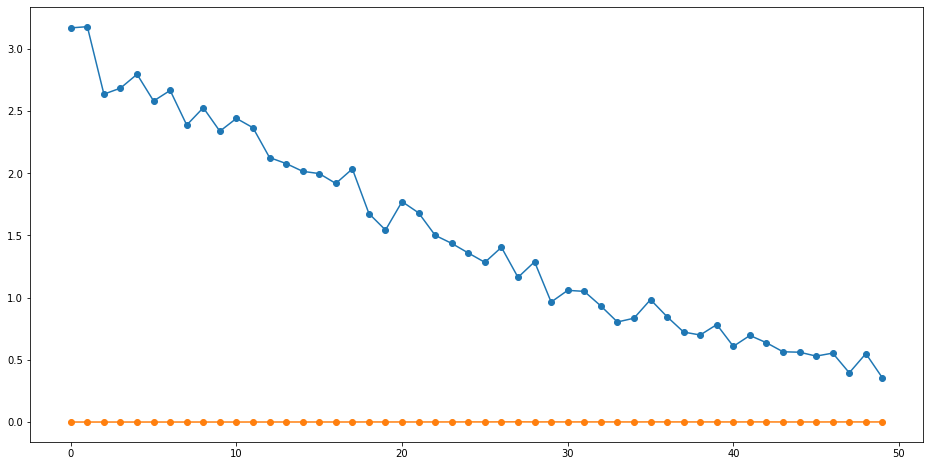

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(d,marker='o')
plt.plot(g,marker='o')
plt.show()

In [ ]:
y_pred = discriminator(test_images).numpy()

In [ ]:
y_pred = tf.keras.utils.to_categorical(np.argmax(y_pred, axis = 1), num_classes + 1)

In [ ]:
y_test = tf.keras.utils.to_categorical(test_labels, num_classes + 1)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_pred[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
import sklearn

In [ ]:
print("Accuracy = ", sklearn.metrics.accuracy_score(y_test,y_pred))

Accuracy =  0.1135


##Une implementation de GAN que j'avais faite 



In [ ]:
# Some libraries that would come in handy all along the way
import numpy as np 
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.layers import Reshape
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Lambda
from keras.layers import Activation
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras import backend


Ce morceau de code sert a récuperer les données d'entrainement, les centraliser et les réduire

In [ ]:
# upload the images
def getData():
  (X_train, y_train), (_, _) = mnist.load_data()
  # insert a new axis to X_train to reshape it fom 28x28 to 28x28x1
  X = X_train[:,:,:, np.newaxis]
  # change the type of X from integer to flaot
  X = X.astype(dtype = 'float32')
  # scale X from [0,255] to [-1,1]
  X = (X - 127.5)/127.5
  
  return [X, y_train]


Gardons uniquement 100 labels repartis uniformement sur les 10 classes


In [ ]:
#select a supervised subset of the original data
def select_samples(data, n_samples=100, n_classes=10):
    X, y = data
    X_list, y_list = [], []
    per_class = int(n_samples/n_classes)
    for i in range(n_classes):
        # get all images for this class
        X_class = X[y == i]
        # choose random instances of the data
        np.random.seed(0) # to be able to generate the same data everytime
        K = np.random.randint(0, len(X_class), per_class)
        # add to the lists
        [X_list.append(X_class[k]) for k in K]
        [y_list.append(i) for k in K]
    
    return np.asarray(X_list), np.asarray(y_list)

In [ ]:
# select real samples
def select_real_samples(data, n_samples):
	# split into images and labels
	images, labels = data
	# choose random instances
	K = np.random.randint(0, images.shape[0], n_samples)
	# select images and labels
	X, labels = images[K], labels[K]
	# generate a class labels of one as real data
	y = np.ones((n_samples, 1))
 
	return [X, labels], y

Calibrer le modèle semi-supervised disciminator: il se compose de deux modèles, le premier est un classifieur binaire (prédire si une image est réelle ou fake, le deuxième est un classifeur mulitcalsse (prédire le label d'une image après avoir été classifiée comme réelle par le premier modèle.
Les deux modèles seront créés separement mais la sortie d'un d'entre eux sera passé comme une entrée à l'autre. Cet approch est connu "Improved Techniques for Training GANs" presenté dans notre articule de réference Saliman 16.
Pour ça, nous aurons besoin d'une fonction d'activation personalisée pour implementer ce modèle

In [ ]:
# a customised activation function
def custom_activation(x):
	log_exp_sum = backend.sum(backend.exp(x), axis=-1, keepdims=True)
	u = log_exp_sum / (log_exp_sum + 1.0)
	return u

In [ ]:
def discriminator(in_shape=(28,28,1), n_classes=10):
	# image input
	in_image = Input(shape=in_shape)
	# downsample
	layer = Conv2D(128, (3,3), strides=(2,2), padding='same')(in_image)
	layer = LeakyReLU(alpha=0.1)(layer)
	# downsample
	layer = Conv2D(128, (3,3), strides=(2,2), padding='same')(layer)
	layer = LeakyReLU(alpha=0.1)(layer)
	# downsample
	layer = Conv2D(128, (3,3), strides=(2,2), padding='same')(layer)
	layer = LeakyReLU(alpha=0.1)(layer)
	# flatten feature maps
	layer = Flatten()(layer)
	# dropout
	layer = Dropout(0.4)(layer)
	# output and the last layer 
	layer = Dense(n_classes)(layer)
	# supervised output
	c_out_layer = Activation('softmax')(layer)
	# compile supervised discriminator model
	c_model = Model(in_image, c_out_layer)
	c_model.compile(loss='sparse_categorical_crossentropy', optimizer=\
                 Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
	# unsupervised output
	d_out_layer = Lambda(custom_activation)(layer)
	# compile unsupervised discriminator model
	d_model = Model(in_image, d_out_layer)
	d_model.compile(loss='binary_crossentropy', optimizer=\
                 Adam(lr=0.0002, beta_1=0.5))
	return d_model, c_model


L'architecture du réseau

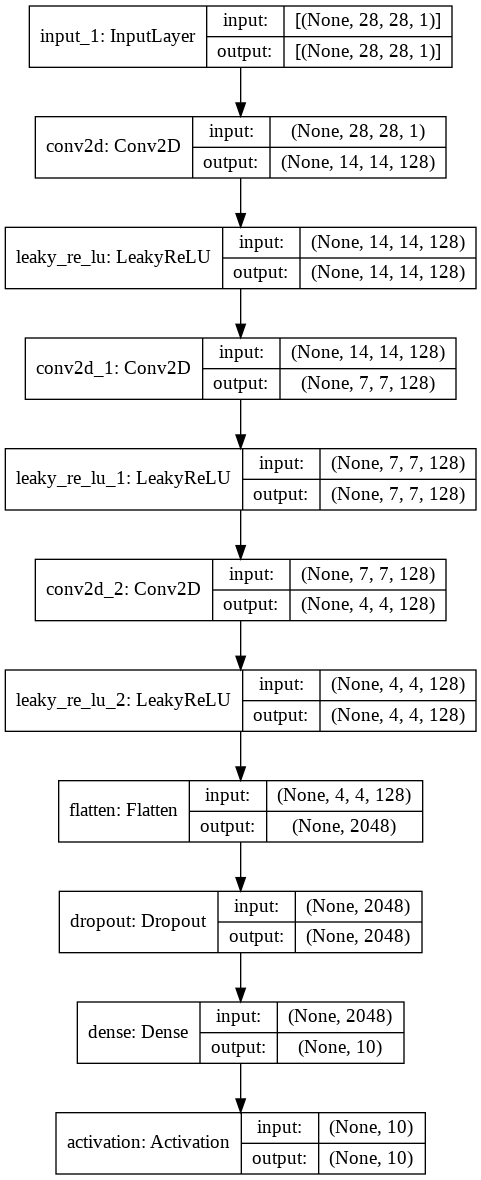

In [ ]:
# plot the architecture of the model
d_model, c_model = discriminator()
plot_model(d_model, to_file='stacked_discriminator1_plot.png', show_shapes=True, show_layer_names=True)
plot_model(c_model, to_file='stacked_discriminator2_plot.png', show_shapes=True, show_layer_names=True)

Implementation du génerateur

In [ ]:
# the generator model
def generator(z_dim):
	# image generator input
	in_z = Input(shape=(z_dim,))
	# for 7x7 image
	n_nodes = 128 * 7 * 7
	gen = Dense(n_nodes)(in_z)
	gen = LeakyReLU(alpha=0.1)(gen)
	gen = Reshape((7, 7, 128))(gen)
	# upsample to 14x14
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
	# upsample to 28x28
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
	# output
	out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
	# calibrate the model
	model = Model(in_z, out_layer)
 
	return model

Combiner les deux modèles pour mettre à jour le génerateur et avoir le modèle GAN

In [ ]:
def GAN(g_model, d_model):
  #avoid training the weiths in the discriminator model
  d_model.trainable = False
  #pass the output of the generator as input to the discriminato
  gan_output = d_model(g_model.output)
  #the gan model
  model = Model(g_model.input, gan_output)
  #compile model
  model.compile(loss='binary_crossentropy', \
                optimizer=Adam(lr=0.0002, beta_1=0.5))
  
  return model

In [ ]:
# generate a noise and use it as an  input for the generator
def simulate(z_dim, n_samples):
	# generate a noise from a standard normal distribution
	z_input = np.random.randn(z_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = z_input.reshape(n_samples, z_dim)
	return z_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, z_dim, n_samples):
	# simulate z_input
	z_input = simulate(z_dim, n_samples)
	# predict outputs
	output = generator.predict(z_input)
	# create class labels as for fake
	y = np.zeros((n_samples, 1))
	return output, y

Une fonction qui evalue le performance du modèle 

In [ ]:
# generate samples and save them as a plot
def evaluate_performance(step, g_model, c_model,\
                         z_dim, data, n_samples=100):
	# prepare the fake generated examples
	X, _ = generate_fake_samples(g_model, z_dim, n_samples)
	# map the values of X from [-1,1] to [0,1]
	X = (X + 1) / 2.0
	# plot images
	for i in range(n_samples):
		plt.subplot(10, 10, 1 + i)
		plt.axis('off')
		# plot raw pixel data
		plt.imshow(X[i, :, :, 0], cmap='gray_r')
  
	# save plot to file
	output1 = 'generated_plot_%04d.png' % (step+1)
	plt.savefig(output1)
	plt.close()
	# evaluate the classifier model
	X, y = data
	_, acc = c_model.evaluate(X, y, verbose=0)
	print('Classifier Accuracy: %.4f%%' % (acc * 100))
	# save the generator model
	output2 = 'g_model_%04d.h5' % (step+1)
	g_model.save(output2)
	# save the classifier model
	output3 = 'c_model_%04d.h5' % (step+1)
	c_model.save(output3)
	print('>Saved: %s, %s, and %s' % (output1, output2, output3))
 

Une fonction train qui entraine le modèle et donne un resumé sur sa performance

In [ ]:
# train the generator and discriminator simultaneously
def train(g_model, d_model, c_model, gan_model, data, \
          z_dim, n_epochs=20, n_batch=100):
	# select supervised data
  X_train, y_train = select_samples(data)
  print(X_train.shape, y_train.shape)
  # the number of batches per training epoch
  batch_per_epo = int(data[0].shape[0]/n_batch)
  # the number of training iterations
  n_steps = batch_per_epo * n_epochs
  half_batch = int(n_batch/2)
  print('n_epochs=%d, n_batch=%d, 1/2=%d, b/e=%d, steps=%d' % \
       (n_epochs, n_batch, half_batch, batch_per_epo, n_steps))
 
    # enumerate epochs
  for i in range(n_steps):
		# update supervised discriminator (c)
      [X_train_real, y_train_real], _ = \
      select_real_samples([X_train, y_train], n_samples = half_batch) 
      c_loss, c_acc = c_model.train_on_batch(X_train_real, y_train_real)
      
      # update unsupervised discriminator (d)
      [X_real, _], y_real = select_real_samples(data, half_batch)
      d_loss1 = d_model.train_on_batch(X_real, y_real)
      X_fake, y_fake = generate_fake_samples(g_model, z_dim, half_batch)
      d_loss2 = d_model.train_on_batch(X_fake, y_fake)
      
      # update generator (g)
      X_gan, y_gan = simulate(z_dim, n_batch), np.ones((n_batch, 1))
      g_loss = gan_model.train_on_batch(X_gan, y_gan)
      # summarize loss on the current batch
      print('>%d, c[%.3f,%.0f], d[%.3f,%.3f], g[%.3f]' \
            %(i+1, c_loss, c_acc*100, d_loss1, d_loss2, g_loss))
      # evaluate the model performance at some iterations
      if (i+1) % (batch_per_epo * 1) == 0:
          evaluate_performance(i, g_model, c_model, z_dim, data) 

Apprendre le modèle et l'evaluer

In [ ]:
# size of the noise z
z_dim = 100
# calibrate the discriminator models
d_model, c_model = discriminator()
# calibrate the generator
g_model = generator(z_dim)
# create the gan
gan_model = GAN(g_model, d_model)
# load image data
data = getData()
# train model
train(g_model, d_model, c_model, gan_model, data, z_dim)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
>7019, c[0.001,100], d[0.635,0.753], g[1.261]
>7020, c[0.000,100], d[0.749,0.724], g[1.356]
>7021, c[0.001,100], d[0.705,0.572], g[1.246]
>7022, c[0.000,100], d[0.761,0.685], g[1.152]
>7023, c[0.000,100], d[0.828,0.781], g[1.039]
>7024, c[0.001,100], d[0.556,0.935], g[1.120]
>7025, c[0.001,100], d[0.487,0.709], g[1.109]
>7026, c[0.001,100], d[0.679,0.602], g[1.347]
>7027, c[0.001,100], d[0.585,0.835], g[1.305]
>7028, c[0.001,100], d[0.630,0.926], g[1.381]
>7029, c[0.001,100], d[0.852,0.718], g[1.189]
>7030, c[0.001,100], d[0.735,0.728], g[1.198]
>7031, c[0.001,100], d[0.688,0.760], g[1.284]
>7032, c[0.001,100], d[0.671,0.872], g[1.223]
>7033, c[0.002,100], d[0.712,0.552], g[1.290]
>7034, c[0.001,100], d[0.670,0.725], g[1.253]
>7035, c[0.001,100], d[0.655,0.837], g[1.205]
>7036, c[0.001,100], d[0.683,0.697], g[1.273]
>7037, c[0.001,100], d[0.669,0.490], g[1.258]
>7038, c[0.001,100], d[0.696,0.652], g[1.075]
>7

Le modèle a un taux de précison proche de 94% trainé uniquement sur 100 labels et evalué sur le jeu de données tout entier!

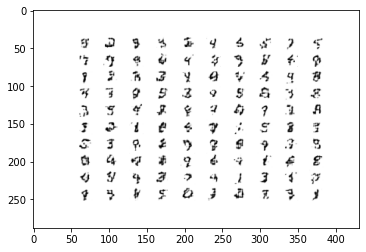

In [ ]:
img=plt.imread("generated_plot_0600.png")
plt.imshow(img)

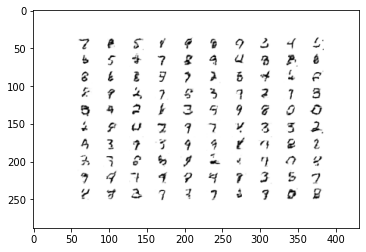

In [ ]:
img=plt.imread("generated_plot_1200.png")
plt.imshow(img)

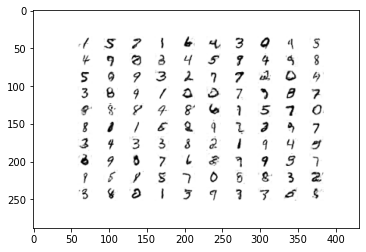

In [ ]:
img=plt.imread("generated_plot_9000.png")
plt.imshow(img)

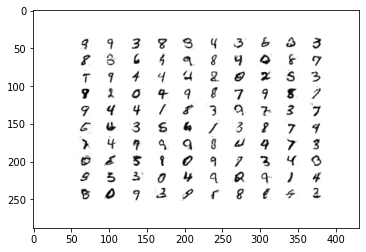

In [ ]:
img=plt.imread("generated_plot_9600.png")
plt.imshow(img)

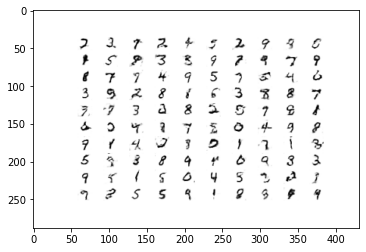

In [ ]:
img=plt.imread("generated_plot_3600.png")
plt.imshow(img)

On voit clairement que les données générées par le générateur s'ameliorent après chaque époch